In [1]:
import pandas as pd

In [6]:
import numpy as np
import pandas as pd
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
shap.initjs()

In [7]:
linear2012 = pd.read_csv('/home/peter/Documents/DSProject/2012Data.csv')

In [8]:
linear2012

,State,County,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.458333,5.0,0,7.0,Parts per million,1.183333,3.3,0,4.3
1,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.458333,5.0,0,7.0,Parts per million,1.152632,2.7,5,31.0
2,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.437500,4.6,2,3.1,Parts per million,1.183333,3.3,0,4.3
3,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.437500,4.6,2,3.1,Parts per million,1.152632,2.7,5,31.0
4,Arizona,Maricopa,2012-01-02,Parts per billion,17.208333,38.0,22,36,Parts per million,0.018042,...,Parts per billion,0.416667,2.0,7,3.0,Parts per million,0.425000,0.9,7,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128201,Wyoming,Sweetwater,2012-12-30,Parts per billion,21.166667,39.0,17,37,Parts per million,0.011875,...,Parts per billion,3.162500,7.3,14,3.1,Parts per million,0.375000,0.5,17,6.0
128202,Wyoming,Sweetwater,2012-12-31,Parts per billion,19.565217,41.0,0,39,Parts per million,0.021000,...,Parts per billion,5.521739,20.0,0,29.0,Parts per million,0.417391,0.5,0,4.3
128203,Wyoming,Sweetwater,2012-12-31,Parts per billion,19.565217,41.0,0,39,Parts per million,0.021000,...,Parts per billion,5.521739,20.0,0,29.0,Parts per million,0.450000,0.5,0,6.0
128204,Wyoming,Sweetwater,2012-12-31,Parts per billion,19.565217,41.0,0,39,Parts per million,0.021000,...,Parts per billion,5.185714,17.0,2,3.1,Parts per million,0.417391,0.5,0,4.3


In [10]:
linear2012.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000
mean,10.575791,21.854587,11.530256,20.396674,0.027293,0.039562,10.138199,35.631109,0.954873,2.311121,9.953684,3.219449,0.299363,0.469516,7.583498,4.451776
std,7.962946,13.789314,7.889531,13.025223,0.011547,0.015110,4.029099,18.993430,1.367160,4.264032,6.747504,4.848605,0.208107,0.386598,8.011980,2.598801
min,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.600000,0.000000,0.000000,-0.333333,-0.300000,0.000000,0.000000
25%,4.521739,10.500000,5.000000,9.000000,0.018958,0.029000,9.000000,25.000000,0.160870,0.400000,5.000000,1.000000,0.170833,0.200000,0.000000,3.000000
50%,8.826087,20.000000,8.000000,19.000000,0.026833,0.038000,10.000000,32.000000,0.550000,1.100000,9.000000,3.100000,0.249542,0.400000,6.000000,4.300000
75%,14.750000,31.600000,20.000000,29.000000,0.035150,0.049000,11.000000,42.000000,1.214286,2.600000,14.000000,3.100000,0.379167,0.600000,13.000000,4.300000
max,59.391304,97.800000,23.000000,97.000000,0.076375,0.116000,23.000000,201.000000,24.785714,211.900000,23.000000,161.000000,3.485714,12.460000,23.000000,55.000000


In [11]:
linear2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128206 entries, 0 to 128205
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              128206 non-null  object 
 1   County             128206 non-null  object 
 2   Date Local         128206 non-null  object 
 3   NO2 Units          128206 non-null  object 
 4   NO2 Mean           128206 non-null  float64
 5   NO2 1st Max Value  128206 non-null  float64
 6   NO2 1st Max Hour   128206 non-null  int64  
 7   NO2 AQI            128206 non-null  int64  
 8   O3 Units           128206 non-null  object 
 9   O3 Mean            128206 non-null  float64
 10  O3 1st Max Value   128206 non-null  float64
 11  O3 1st Max Hour    128206 non-null  int64  
 12  O3 AQI             128206 non-null  int64  
 13  SO2 Units          128206 non-null  object 
 14  SO2 Mean           128206 non-null  float64
 15  SO2 1st Max Value  128206 non-null  float64
 16  SO

In [12]:
linear2012.head(3)

,State,County,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.458333,5.0,0,7.0,Parts per million,1.183333,3.3,0,4.3
1,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.458333,5.0,0,7.0,Parts per million,1.152632,2.7,5,31.0
2,Arizona,Maricopa,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,...,Parts per billion,1.437500,4.6,2,3.1,Parts per million,1.183333,3.3,0,4.3


In [15]:
linear2012.drop(columns=["State", "County"], inplace=True)

In [16]:
linear2012

,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,0.028,11,...,Parts per billion,1.458333,5.0,0,7.0,Parts per million,1.183333,3.3,0,4.3
1,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,0.028,11,...,Parts per billion,1.458333,5.0,0,7.0,Parts per million,1.152632,2.7,5,31.0
2,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,0.028,11,...,Parts per billion,1.437500,4.6,2,3.1,Parts per million,1.183333,3.3,0,4.3
3,2012-01-01,Parts per billion,21.208333,33.0,0,31,Parts per million,0.015083,0.028,11,...,Parts per billion,1.437500,4.6,2,3.1,Parts per million,1.152632,2.7,5,31.0
4,2012-01-02,Parts per billion,17.208333,38.0,22,36,Parts per million,0.018042,0.034,9,...,Parts per billion,0.416667,2.0,7,3.0,Parts per million,0.425000,0.9,7,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128201,2012-12-30,Parts per billion,21.166667,39.0,17,37,Parts per million,0.011875,0.024,8,...,Parts per billion,3.162500,7.3,14,3.1,Parts per million,0.375000,0.5,17,6.0
128202,2012-12-31,Parts per billion,19.565217,41.0,0,39,Parts per million,0.021000,0.039,17,...,Parts per billion,5.521739,20.0,0,29.0,Parts per million,0.417391,0.5,0,4.3
128203,2012-12-31,Parts per billion,19.565217,41.0,0,39,Parts per million,0.021000,0.039,17,...,Parts per billion,5.521739,20.0,0,29.0,Parts per million,0.450000,0.5,0,6.0
128204,2012-12-31,Parts per billion,19.565217,41.0,0,39,Parts per million,0.021000,0.039,17,...,Parts per billion,5.185714,17.0,2,3.1,Parts per million,0.417391,0.5,0,4.3


In [17]:
linear2012.drop(columns=["NO2 Units", "O3 Units", "SO2 Units", "CO Units"], inplace=True)

In [18]:
linear2012

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2012-01-01,21.208333,33.0,0,31,0.015083,0.028,11,24,1.458333,5.0,0,7.0,1.183333,3.3,0,4.3
1,2012-01-01,21.208333,33.0,0,31,0.015083,0.028,11,24,1.458333,5.0,0,7.0,1.152632,2.7,5,31.0
2,2012-01-01,21.208333,33.0,0,31,0.015083,0.028,11,24,1.437500,4.6,2,3.1,1.183333,3.3,0,4.3
3,2012-01-01,21.208333,33.0,0,31,0.015083,0.028,11,24,1.437500,4.6,2,3.1,1.152632,2.7,5,31.0
4,2012-01-02,17.208333,38.0,22,36,0.018042,0.034,9,29,0.416667,2.0,7,3.0,0.425000,0.9,7,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128201,2012-12-30,21.166667,39.0,17,37,0.011875,0.024,8,20,3.162500,7.3,14,3.1,0.375000,0.5,17,6.0
128202,2012-12-31,19.565217,41.0,0,39,0.021000,0.039,17,33,5.521739,20.0,0,29.0,0.417391,0.5,0,4.3
128203,2012-12-31,19.565217,41.0,0,39,0.021000,0.039,17,33,5.521739,20.0,0,29.0,0.450000,0.5,0,6.0
128204,2012-12-31,19.565217,41.0,0,39,0.021000,0.039,17,33,5.185714,17.0,2,3.1,0.417391,0.5,0,4.3


In [23]:
swt_data = linear2012.groupby([linear2012['Date Local'].dt.date]).mean()

AttributeError: Can only use .dt accessor with datetimelike values

In [25]:
linear2012['Date Local'] = pd.to_datetime(linear2012['Date Local'], utc=True)
linear2012.sort_values(by=['Date Local'], inplace=True, ascending=True)

In [26]:
linear2012

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2012-01-01 00:00:00+00:00,21.208333,33.0,0,31,0.015083,0.028,11,24,1.458333,5.0,0,7.0,1.183333,3.300,0,4.3
42564,2012-01-01 00:00:00+00:00,20.478261,37.0,1,35,0.011292,0.022,9,19,-0.150000,0.0,2,3.1,0.312500,0.900,19,4.3
42563,2012-01-01 00:00:00+00:00,20.478261,37.0,1,35,0.011292,0.022,9,19,-0.166667,0.0,0,0.0,0.294737,0.400,19,5.0
42562,2012-01-01 00:00:00+00:00,20.478261,37.0,1,35,0.011292,0.022,9,19,-0.166667,0.0,0,0.0,0.312500,0.900,19,4.3
93922,2012-01-01 00:00:00+00:00,2.529167,5.8,18,5,0.027208,0.031,10,26,0.275000,0.4,0,0.0,0.151250,0.220,22,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22628,2012-12-31 00:00:00+00:00,24.431818,36.3,19,34,0.016158,0.027,9,23,0.614286,0.9,8,3.1,0.822727,1.700,22,4.3
22627,2012-12-31 00:00:00+00:00,24.431818,36.3,19,34,0.016158,0.027,9,23,0.630435,1.1,8,1.0,0.370833,0.900,23,10.0
22626,2012-12-31 00:00:00+00:00,24.431818,36.3,19,34,0.016158,0.027,9,23,0.630435,1.1,8,1.0,0.527261,1.438,22,4.3
108753,2012-12-31 00:00:00+00:00,11.790909,19.9,17,18,0.028737,0.033,8,28,2.277273,4.4,22,6.0,0.212500,0.300,20,3.0


In [27]:
swt_data = linear2012.groupby([linear2012['Date Local'].dt.date]).mean()

In [28]:
swt_data

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
Date Local,,,,,,,,,,,,,,,,
2012-01-01,11.056280,20.263636,10.532468,18.870130,0.019244,0.028221,12.441558,23.935065,1.090039,2.760390,7.863636,3.537013,0.436689,0.751532,7.902597,5.890260
2012-01-02,11.235966,21.725974,16.428571,20.259740,0.019090,0.028195,8.558442,23.870130,1.360057,3.414935,12.090909,4.088961,0.369813,0.572110,11.363636,4.981169
2012-01-03,15.185234,26.830380,12.164557,25.126582,0.016850,0.024532,9.607595,20.797468,1.472314,3.636076,11.392405,4.309494,0.452820,0.770291,10.031646,5.719620
2012-01-04,18.342541,30.864151,14.440252,28.918239,0.013196,0.022333,8.025157,18.880503,1.959835,5.258805,11.386792,5.691509,0.484019,0.866811,8.276730,6.142767
2012-01-05,19.283042,30.477778,13.012346,28.506173,0.013572,0.023074,11.444444,19.543210,2.157048,4.950617,11.987654,5.284568,0.472963,0.864593,10.839506,6.248765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,11.379955,22.121111,13.200000,20.566667,0.020672,0.029311,10.333333,24.800000,0.857961,1.764444,11.922222,2.683333,0.335063,0.535239,9.105556,4.744444
2012-12-28,14.208816,26.459783,14.108696,24.760870,0.017027,0.027011,10.684783,22.869565,0.999364,1.922283,11.652174,2.832609,0.382322,0.628880,10.630435,5.264130
2012-12-29,14.294127,26.480435,11.228261,24.717391,0.017975,0.028674,12.043478,24.304348,1.286871,2.661413,10.798913,3.386957,0.387962,0.657783,9.657609,5.486957


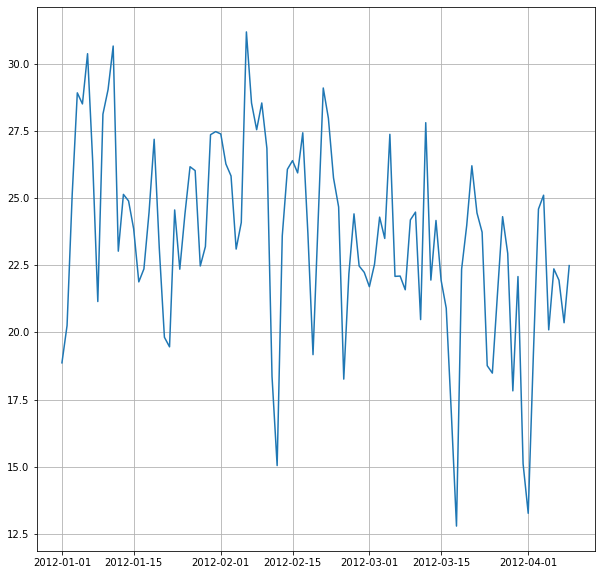

In [48]:
plt.figure(figsize=(10,10))
plt.plot(swt_data["NO2 AQI"][:100])
plt.grid()
plt.show()

[]

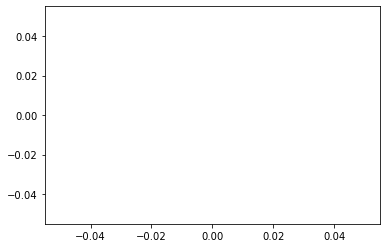

In [49]:
plt.plot()

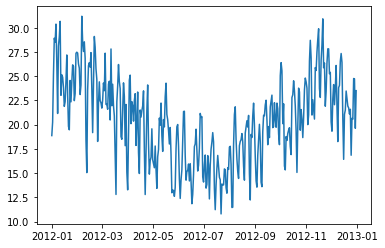

In [50]:
plt.plot(swt_data["NO2 AQI"])

In [52]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[]

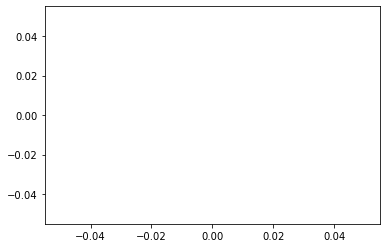

In [54]:
plt.plot()

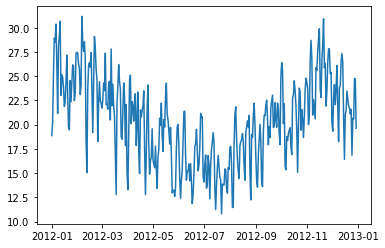

In [59]:
plt.plot(swt_data["NO2 AQI"][:365])

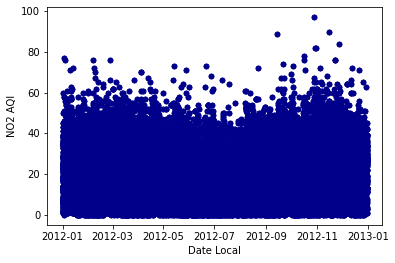

In [60]:
ax1 = linear2012.plot.scatter(x='Date Local',

                      y='NO2 AQI',

                      c='DarkBlue')

In [61]:
linear2012.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000,128206.000000
mean,10.575791,21.854587,11.530256,20.396674,0.027293,0.039562,10.138199,35.631109,0.954873,2.311121,9.953684,3.219449,0.299363,0.469516,7.583498,4.451776
std,7.962946,13.789314,7.889531,13.025223,0.011547,0.015110,4.029099,18.993430,1.367160,4.264032,6.747504,4.848605,0.208107,0.386598,8.011980,2.598801
min,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.600000,0.000000,0.000000,-0.333333,-0.300000,0.000000,0.000000
25%,4.521739,10.500000,5.000000,9.000000,0.018958,0.029000,9.000000,25.000000,0.160870,0.400000,5.000000,1.000000,0.170833,0.200000,0.000000,3.000000
50%,8.826087,20.000000,8.000000,19.000000,0.026833,0.038000,10.000000,32.000000,0.550000,1.100000,9.000000,3.100000,0.249542,0.400000,6.000000,4.300000
75%,14.750000,31.600000,20.000000,29.000000,0.035150,0.049000,11.000000,42.000000,1.214286,2.600000,14.000000,3.100000,0.379167,0.600000,13.000000,4.300000
max,59.391304,97.800000,23.000000,97.000000,0.076375,0.116000,23.000000,201.000000,24.785714,211.900000,23.000000,161.000000,3.485714,12.460000,23.000000,55.000000


In [62]:
linear2012

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2012-01-01 00:00:00+00:00,21.208333,33.0,0,31,0.015083,0.028,11,24,1.458333,5.0,0,7.0,1.183333,3.300,0,4.3
42564,2012-01-01 00:00:00+00:00,20.478261,37.0,1,35,0.011292,0.022,9,19,-0.150000,0.0,2,3.1,0.312500,0.900,19,4.3
42563,2012-01-01 00:00:00+00:00,20.478261,37.0,1,35,0.011292,0.022,9,19,-0.166667,0.0,0,0.0,0.294737,0.400,19,5.0
42562,2012-01-01 00:00:00+00:00,20.478261,37.0,1,35,0.011292,0.022,9,19,-0.166667,0.0,0,0.0,0.312500,0.900,19,4.3
93922,2012-01-01 00:00:00+00:00,2.529167,5.8,18,5,0.027208,0.031,10,26,0.275000,0.4,0,0.0,0.151250,0.220,22,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22628,2012-12-31 00:00:00+00:00,24.431818,36.3,19,34,0.016158,0.027,9,23,0.614286,0.9,8,3.1,0.822727,1.700,22,4.3
22627,2012-12-31 00:00:00+00:00,24.431818,36.3,19,34,0.016158,0.027,9,23,0.630435,1.1,8,1.0,0.370833,0.900,23,10.0
22626,2012-12-31 00:00:00+00:00,24.431818,36.3,19,34,0.016158,0.027,9,23,0.630435,1.1,8,1.0,0.527261,1.438,22,4.3
108753,2012-12-31 00:00:00+00:00,11.790909,19.9,17,18,0.028737,0.033,8,28,2.277273,4.4,22,6.0,0.212500,0.300,20,3.0


In [67]:
linear2012.plot(x='NO2 AQI', y='NO2 AQI', style='o')
plt.show()

KeyError: 'NO2 AQI'

In [91]:
n2max = linear2012['NO2 AQI'].max()

In [80]:
n2min

0         31
42564     35
42563     35
42562     35
93922      5
          ..
22628     34
22627     34
22626     34
108753    18
128205    39
Name: NO2 AQI, Length: 128206, dtype: int64

In [83]:
linear2012.sort_values(by=['NO2 AQI'],inplace = True)

In [84]:
linear2012

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
18212,2012-04-12 00:00:00+00:00,0.204545,0.6,17,0,0.043292,0.046,13,39,0.000000,0.0,2,3.1,0.300000,0.3,0,4.3
37299,2012-05-19 00:00:00+00:00,0.000000,0.0,0,0,0.044208,0.047,8,40,1.042857,1.3,8,3.1,0.200000,0.2,0,2.0
36911,2012-02-12 00:00:00+00:00,0.000000,0.0,0,0,0.037550,0.039,0,33,1.000000,1.0,5,3.1,0.125000,0.2,15,2.0
124774,2012-06-16 00:00:00+00:00,0.120833,0.6,21,0,0.035000,0.039,7,33,-0.037500,0.1,21,0.0,0.270833,0.3,0,4.3
124775,2012-06-16 00:00:00+00:00,0.120833,0.6,21,0,0.035000,0.039,7,33,-0.037500,0.1,21,0.0,0.270833,0.3,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20315,2012-11-15 00:00:00+00:00,38.434783,91.0,12,90,0.001333,0.006,0,5,1.260870,3.0,11,4.0,1.350000,2.2,23,25.0
23787,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.812500,1.4,11,16.0
23784,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,2.839130,13.2,12,19.0,0.817391,2.1,6,4.3
23786,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.817391,2.1,6,4.3


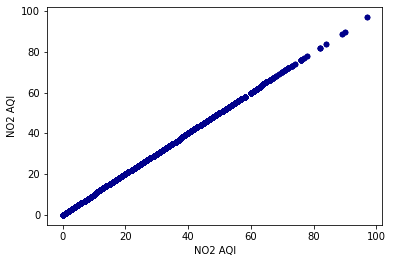

In [89]:
ax1 = linear2012.plot.scatter(y='NO2 AQI',

                      x='NO2 AQI',

                      c='DarkBlue')

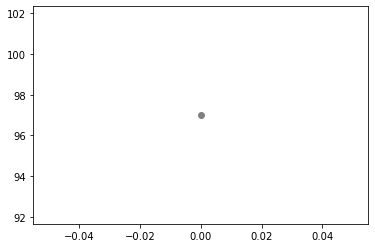

In [92]:
plt.scatter(n2min,n2max,color='grey')
plt.plot(n2min,n2max,color='red', linewidth=2)
plt.show()

In [96]:
linearhello=linear2012
linearhello.sort_values(by=['NO2 AQI'],ascending = False)

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
23785,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,2.839130,13.2,12,19.0,0.812500,1.4,11,16.0
23784,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,2.839130,13.2,12,19.0,0.817391,2.1,6,4.3
23787,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.812500,1.4,11,16.0
23786,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.817391,2.1,6,4.3
20315,2012-11-15 00:00:00+00:00,38.434783,91.0,12,90,0.001333,0.006,0,5,1.260870,3.0,11,4.0,1.350000,2.2,23,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36911,2012-02-12 00:00:00+00:00,0.000000,0.0,0,0,0.037550,0.039,0,33,1.000000,1.0,5,3.1,0.125000,0.2,15,2.0
37299,2012-05-19 00:00:00+00:00,0.000000,0.0,0,0,0.044208,0.047,8,40,1.042857,1.3,8,3.1,0.200000,0.2,0,2.0
94215,2012-03-17 00:00:00+00:00,-0.100000,-0.1,0,0,0.001000,0.001,0,1,0.070833,0.2,22,0.0,0.137500,0.2,0,2.0
37298,2012-05-19 00:00:00+00:00,0.000000,0.0,0,0,0.044208,0.047,8,40,1.042857,1.3,8,3.1,0.200000,0.2,0,4.3


In [94]:
linear2012

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
18212,2012-04-12 00:00:00+00:00,0.204545,0.6,17,0,0.043292,0.046,13,39,0.000000,0.0,2,3.1,0.300000,0.3,0,4.3
37472,2012-07-02 00:00:00+00:00,0.000000,0.0,0,0,0.027905,0.031,15,26,1.350000,2.0,0,3.0,0.000000,0.0,0,4.3
37473,2012-07-02 00:00:00+00:00,0.000000,0.0,0,0,0.027905,0.031,15,26,1.350000,2.0,0,3.0,0.000000,0.0,0,0.0
37474,2012-07-02 00:00:00+00:00,0.000000,0.0,0,0,0.027905,0.031,15,26,1.250000,1.6,8,3.1,0.000000,0.0,0,4.3
36039,2012-07-08 00:00:00+00:00,0.000000,0.0,0,0,0.029550,0.032,16,27,1.000000,1.0,0,1.0,0.200000,0.2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20315,2012-11-15 00:00:00+00:00,38.434783,91.0,12,90,0.001333,0.006,0,5,1.260870,3.0,11,4.0,1.350000,2.2,23,25.0
23786,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.817391,2.1,6,4.3
23787,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.812500,1.4,11,16.0
23784,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,2.839130,13.2,12,19.0,0.817391,2.1,6,4.3


In [97]:
linearhello

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
18212,2012-04-12 00:00:00+00:00,0.204545,0.6,17,0,0.043292,0.046,13,39,0.000000,0.0,2,3.1,0.300000,0.3,0,4.3
37472,2012-07-02 00:00:00+00:00,0.000000,0.0,0,0,0.027905,0.031,15,26,1.350000,2.0,0,3.0,0.000000,0.0,0,4.3
37473,2012-07-02 00:00:00+00:00,0.000000,0.0,0,0,0.027905,0.031,15,26,1.350000,2.0,0,3.0,0.000000,0.0,0,0.0
37474,2012-07-02 00:00:00+00:00,0.000000,0.0,0,0,0.027905,0.031,15,26,1.250000,1.6,8,3.1,0.000000,0.0,0,4.3
36039,2012-07-08 00:00:00+00:00,0.000000,0.0,0,0,0.029550,0.032,16,27,1.000000,1.0,0,1.0,0.200000,0.2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20315,2012-11-15 00:00:00+00:00,38.434783,91.0,12,90,0.001333,0.006,0,5,1.260870,3.0,11,4.0,1.350000,2.2,23,25.0
23786,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.817391,2.1,6,4.3
23787,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,3.014286,9.6,14,3.1,0.812500,1.4,11,16.0
23784,2012-10-29 00:00:00+00:00,43.213043,97.8,12,97,0.017792,0.034,13,29,2.839130,13.2,12,19.0,0.817391,2.1,6,4.3


ConversionError: Failed to convert value(s) to axis units:                      Date Local   NO2 Mean  NO2 1st Max Value  \
18212 2012-04-12 00:00:00+00:00   0.204545                0.6   
37472 2012-07-02 00:00:00+00:00   0.000000                0.0   
37473 2012-07-02 00:00:00+00:00   0.000000                0.0   
37474 2012-07-02 00:00:00+00:00   0.000000                0.0   
36039 2012-07-08 00:00:00+00:00   0.000000                0.0   
...                         ...        ...                ...   
20315 2012-11-15 00:00:00+00:00  38.434783               91.0   
23786 2012-10-29 00:00:00+00:00  43.213043               97.8   
23787 2012-10-29 00:00:00+00:00  43.213043               97.8   
23784 2012-10-29 00:00:00+00:00  43.213043               97.8   
23785 2012-10-29 00:00:00+00:00  43.213043               97.8   

       NO2 1st Max Hour  NO2 AQI   O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
18212                17        0  0.043292             0.046               13   
37472                 0        0  0.027905             0.031               15   
37473                 0        0  0.027905             0.031               15   
37474                 0        0  0.027905             0.031               15   
36039                 0        0  0.029550             0.032               16   
...                 ...      ...       ...               ...              ...   
20315                12       90  0.001333             0.006                0   
23786                12       97  0.017792             0.034               13   
23787                12       97  0.017792             0.034               13   
23784                12       97  0.017792             0.034               13   
23785                12       97  0.017792             0.034               13   

       O3 AQI  SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
18212      39  0.000000                0.0                 2      3.1   
37472      26  1.350000                2.0                 0      3.0   
37473      26  1.350000                2.0                 0      3.0   
37474      26  1.250000                1.6                 8      3.1   
36039      27  1.000000                1.0                 0      1.0   
...       ...       ...                ...               ...      ...   
20315       5  1.260870                3.0                11      4.0   
23786      29  3.014286                9.6                14      3.1   
23787      29  3.014286                9.6                14      3.1   
23784      29  2.839130               13.2                12     19.0   
23785      29  2.839130               13.2                12     19.0   

        CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  
18212  0.300000               0.3                0     4.3  
37472  0.000000               0.0                0     4.3  
37473  0.000000               0.0                0     0.0  
37474  0.000000               0.0                0     4.3  
36039  0.200000               0.2                0     2.0  
...         ...               ...              ...     ...  
20315  1.350000               2.2               23    25.0  
23786  0.817391               2.1                6     4.3  
23787  0.812500               1.4               11    16.0  
23784  0.817391               2.1                6     4.3  
23785  0.812500               1.4               11    16.0  

[128206 rows x 17 columns]

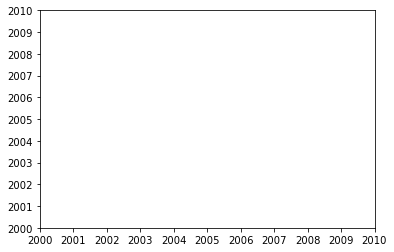

In [98]:
plt.scatter(linear2012,linearhello,color='grey')
plt.plot(linear2012,linearhello,color='red', linewidth=2)
plt.show()